## Pokémon: Exploração do Dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Perguntas e Tarefas:

0. Explore os atributos do dataset e procure por valores nulos e duplicados;
1. Qual o tipo de pokémon mais presente no dataset? (considere as duas colunas para isso);
2. Exiba em um gráfico a quantidade de pokémons por tipo (considere as duas colunas para isso);
3. Liste os 10 pokémons mais poderosos a partir de uma medida de agregação;
4. Liste os pokemóns mais poderosos por tipo (considere as duas colunas para isso);
5. Os pokémons lendários são, em média, mais fortes ou mais fracos que os pokémons normais?
6. Liste, por categoria, a média das habilidades dos pokémons;

### Funções para plotagem de gráficos.

In [2]:
def pie_plot(dict_geracoes: dict[int: int]) -> None:
    
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(dict_geracoes.values(), labels=dict_geracoes.keys(), autopct='%1.1f%%', startangle=90)

    ax.axis('equal')
    plt.title('Gerações de Pokémons em Porcentagens')
    plt.show()

In [3]:
def correlation_plot(df: pd.DataFrame, titulo: str) -> None:

    # Calcula a matriz de correlação.
    correlation_matrix = df.corr()

    # Cria uma mapa de calor utilizando o seaborn.
    sns.set(style="white")
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)

    # Adiciona um título.
    plt.title(titulo)

    # Exibe o gráfico.
    plt.show()

In [4]:
def radar_plot(categorias: list[str], valores: list[int]) -> None:

    # Número de categorias.
    N = len(categorias)

    # Calcula os ângulos para cada categoria.
    angulos = np.linspace(0, 2*np.pi, N, endpoint=False)

    # Agrupa o gráfico
    valores = np.concatenate((valores, [valores[0]]))
    angulos = np.concatenate((angulos, [angulos[0]]))

    # Cria o gráfico
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})
    ax.plot(angulos, valores, 'o-', linewidth=2, label='Data')
    ax.fill(angulos, valores, alpha=0.25)

    # Atribui os labels para cada categoria
    ax.set_xticks(angulos[:-1])
    ax.set_xticklabels(categorias)

    # Atribui o label do eixo do raio.
    ax.set_rlabel_position(0)
    ax.set_yticklabels([])  # Pode customizar os labels do eixo do raio se necessário.

    # Aplica legenda e título
    plt.title('Radar Plot')
    ax.legend(loc='upper right')

    # Utiliza o estilo do seaborn.
    sns.set()

    # Exibe o gráfico.
    plt.show()

In [5]:
def bar_plot(df: pd.DataFrame, eixo_x: str, eixo_y: str, titulo: str) -> None:
    
    ax = sns.barplot(x=eixo_x, y=eixo_y, data=df)

    # Add labels and title
    plt.xlabel(eixo_x)
    plt.ylabel(eixo_y)
    
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}', 
                ha='center', va='bottom', fontsize=10, color='black')
    
    plt.xticks(rotation=90)
    
    plt.title(titulo)

    # Show the plot
    plt.show()

### Carregando o *dataset*.

In [6]:
df_pokemon = pd.read_csv("../dados/pokemon-kaggle/pokemon.csv")
df_pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


0. Explore os atributos do dataset e procure por valores nulos e duplicados;

In [7]:
# procurando por valores nulos.
print(f"{df_pokemon.info()}\n")

# procurando por valores duplicados.
print(df_pokemon[df_pokemon.duplicated()])

# Preenchendo os valores nulos de "Type 2" por string vazia.
df_pokemon["Type 2"] = df_pokemon["Type 2"].fillna('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
None

Empty DataFrame
Columns: [#, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary]
Index: []


### 1. Qual o tipo de pokémon mais presente no dataset? (considere as duas colunas para isso);

In [8]:
# Verificando se há valores duplicados nas colunas 'Type 1' e 'Type 2'
print(f"Colunas 'Type 1' e 'Type 2' com valores duplicados: {len(df_pokemon[df_pokemon['Type 1'] == df_pokemon['Type 2']])}")

# Criando uma nova coluna 'Type' a partir das colunas 'Type 1' e 'Type 2'.
df_pokemon["Type"] = df_pokemon['Type 1'] + " " + df_pokemon['Type 2']

# Deleta as colunas irrelevantes.
df_pokemon = df_pokemon.drop(columns=["#", "Type 1", "Type 2"])

# exibindo o tipo de pokemón mais presente no dataset.
print(f"\nCategoria de pokémon mais presente: {df_pokemon['Type'].mode().to_list()[0]}\n")

# A Função 'value_counts' também pode ser utilizada.
print(df_pokemon["Type"].value_counts())

Colunas 'Type 1' e 'Type 2' com valores duplicados: 0

Categoria de pokémon mais presente: Normal 

Type
Normal            61
Water             59
Psychic           38
Grass             33
Fire              28
                  ..
Electric Grass     1
Steel Dragon       1
Fire Steel         1
Psychic Fire       1
Fire Water         1
Name: count, Length: 154, dtype: int64


### 2. Exiba em um gráfico a quantidade de pokémons por tipo (considere as duas colunas para isso);

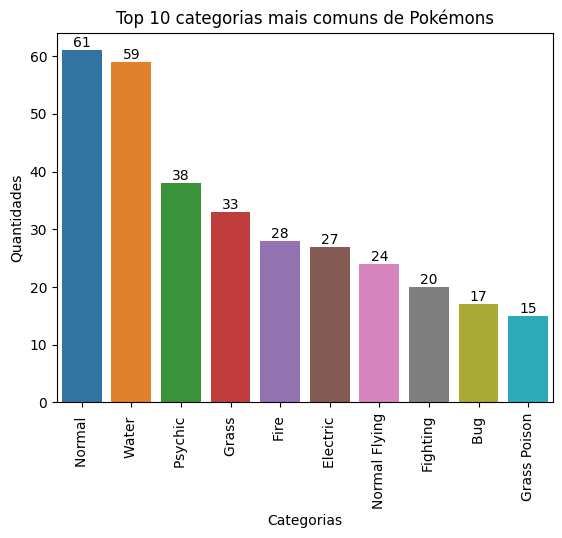

In [9]:
df_pokemon_counts = df_pokemon["Type"].value_counts().to_frame().reset_index()
df_pokemon_counts = df_pokemon_counts.rename(columns={"Type": "Categorias", "count": "Quantidades"}).head(10)

bar_plot(df_pokemon_counts, df_pokemon_counts.columns[0], df_pokemon_counts.columns[1], 'Top 10 categorias mais comuns de Pokémons')

### 3. Liste os 10 pokémons mais poderosos a partir de uma medida de agregação;

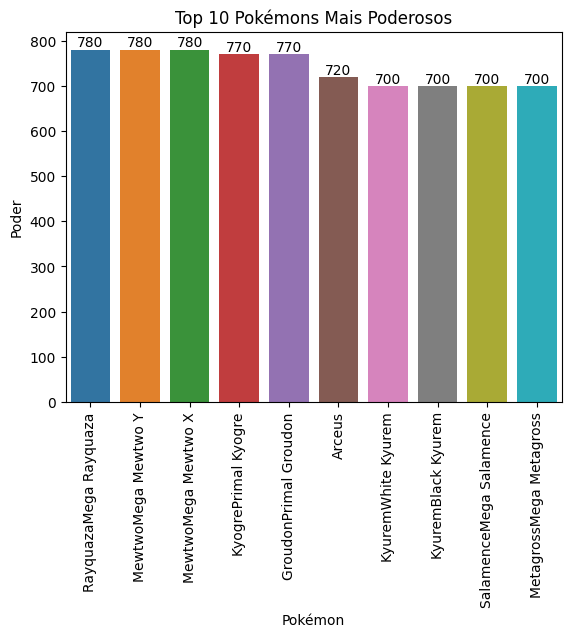

In [10]:
# Vamos utilizar a coluna 'Total' para isso. Ela é a agregação de todas as outras habilidades do pokémon.
df_pokemons_poderosos = df_pokemon.sort_values(ascending=False, by="Total").reset_index()[["Name", "Total"]].head(10)
df_pokemons_poderosos = df_pokemons_poderosos.rename(columns={"Name": "Pokémon", "Total": "Poder"})

bar_plot(df_pokemons_poderosos, df_pokemons_poderosos.columns[0], df_pokemons_poderosos.columns[1], "Top 10 Pokémons Mais Poderosos")

### 4. Liste os pokemóns mais poderosos por tipo (considere as duas colunas para isso);

In [11]:
df_poder_categoria = df_pokemon.groupby(by="Type")[["Name", "Total"]].max().reset_index().head(10)

### 5. Os pokémons lendários são, em média, mais fortes ou mais fracos que os pokémons normais?

In [12]:
df_pokemons_lendarios = df_pokemon.query("Legendary == 1")
df_pokemons_comuns    = df_pokemon.query("Legendary == 0")

mean_pokemons_lendarios, std_pokemons_lendarios = df_pokemons_lendarios['Total'].mean(), df_pokemons_lendarios['Total'].std()
mean_pokemons_comuns, std_pokemons_comuns    = df_pokemons_comuns['Total'].mean(), df_pokemons_comuns['Total'].std()

print(f"Média de poder dos pokémons lendários:\t{mean_pokemons_lendarios:.2f}\tDesvio Padrão: {std_pokemons_lendarios:.2f}")
print(f"Média de poder dos pokémons comuns:\t{mean_pokemons_comuns:.2f}\tDesvio Padrão: {std_pokemons_comuns:.2f}")

Média de poder dos pokémons lendários:	637.38	Desvio Padrão: 60.94
Média de poder dos pokémons comuns:	417.21	Desvio Padrão: 106.76


### 6. Liste, por categoria, a média das habilidades dos pokémons;

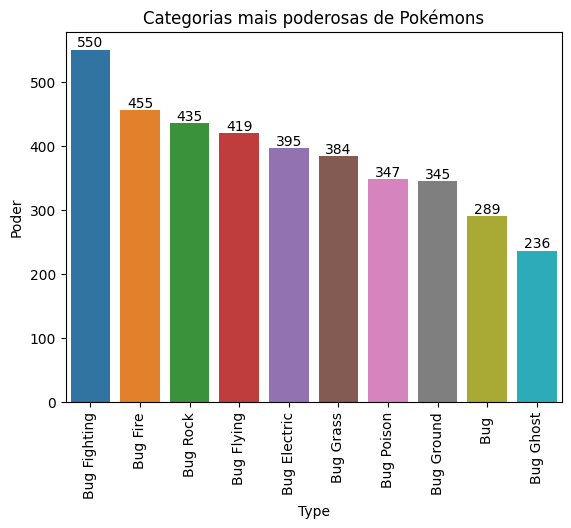

In [13]:
df_poder_categoria_mean = df_pokemon.groupby("Type")["Total"].mean().reset_index().head(10).sort_values(by="Total", ascending=False)
df_poder_categoria_mean = df_poder_categoria_mean.rename(columns={"Name": "Pokémon", "Total": "Poder"})

bar_plot(df_poder_categoria_mean, df_poder_categoria_mean.columns[0], df_poder_categoria_mean.columns[1], "Categorias mais poderosas de Pokémons")